In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.datasets import make_regression, make_swiss_roll
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [1]:
# Import the data
df_1 = "data/diabetes_012_health_indicators_BRFSS2015.csv"
#df_2 = "diabetes_binary_5050split_health_indicators_BRFSS2015.csv"
#df_3 = "diabetes_binary_health_indicators_BRFSS2015.csv"

df_1 = pd.read_csv(df_1)
#df_2 = pd.read_csv(df_2)
#df_3 = pd.read_csv(df_3)

display(df_1.head())
#display(df_2.head())
#display(df_3.head())

# df_1: 0 is for no diabetes, 1 is for prediabetes, and 2 is for diabetes. 
# df_2: 0 is for no diabetes, and 1 is for prediabetes or diabetes
# df_3: 0 is for no diabetes, and 1 is for prediabetes or diabetes

NameError: name 'pd' is not defined

In [ ]:
df_1.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [ ]:
X = df_1.copy().drop(columns=["Diabetes_012"])
y = df_1['Diabetes_012']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
# Scaling the X data by using StandardScaler()
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_train_scaled

array([[-0.86570947, -0.85831784,  0.19724534, ..., -0.99211631,
         0.96169096,  0.93983443],
       [-0.86570947,  1.16506958,  0.19724534, ..., -1.64718174,
         0.96169096,  0.93983443],
       [-0.86570947, -0.85831784,  0.19724534, ..., -2.30224716,
        -0.05145611,  0.4576172 ],
       ...,
       [-0.86570947, -0.85831784,  0.19724534, ..., -0.33705089,
        -2.07775026, -0.50681725],
       [ 1.15512193, -0.85831784,  0.19724534, ...,  1.30061267,
        -1.06460318, -0.50681725],
       [ 1.15512193,  1.16506958,  0.19724534, ...,  0.64554725,
        -1.06460318,  0.4576172 ]])

In [ ]:
# Transforming the test dataset based on the fit from the training dataset
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[-0.86570947, -0.85831784,  0.19724534, ..., -0.33705089,
        -0.05145611, -0.02460002],
       [ 1.15512193,  1.16506958,  0.19724534, ...,  1.62814538,
        -1.06460318, -0.50681725],
       [-0.86570947, -0.85831784,  0.19724534, ..., -1.31964903,
         0.96169096,  0.93983443],
       ...,
       [-0.86570947,  1.16506958,  0.19724534, ...,  0.31801454,
        -2.07775026, -1.4712517 ],
       [-0.86570947, -0.85831784,  0.19724534, ...,  0.97307996,
        -0.05145611,  0.93983443],
       [-0.86570947, -0.85831784,  0.19724534, ..., -0.6645836 ,
         0.96169096, -0.50681725]])

In [ ]:
def test_model(model, data):
    X_train_scaled, X_test_scaled, y_train, y_test = data
    reg = model.fit(X_train_scaled, y_train)
    print(f'Model: {type(reg).__name__}')
    print(f'Train score: {reg.score(X_train_scaled, y_train)}')
    print(f'Test Score: {reg.score(X_test_scaled, y_test)}\n')
    plt.show()

In [ ]:
data = [X_train_scaled, X_test_scaled, y_train, y_test]

NameError: name 'X_train_scaled' is not defined

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.svm import SVR

In [ ]:
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier


In [ ]:
# test_model(SVC(kernel='linear'), data)

# test_model(KNeighborsClassifier(n_neighbors=5), data)
# test_model(tree.DecisionTreeClassifier(), data)
# test_model(RandomForestClassifier(), data)
# test_model(ExtraTreesClassifier(random_state=1), data)
# test_model(GradientBoostingClassifier(random_state=1), data)
# test_model(AdaBoostClassifier(random_state=1), data)

# test_model(LogisticRegression(), data)


In [ ]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
# Plot the results
plt.plot(range(1, 20, 2), train_scores, marker='o', label="training scores")
plt.plot(range(1, 20, 2), test_scores, marker="x", label="testing scores")
plt.xlabel("k neighbors")
plt.ylabel("accuracy score")
plt.legend()
plt.show()

NameError: name 'X_train_scaled' is not defined

In [ ]:
test_model(KNeighborsClassifier(n_neighbors=9), data)

Model: KNeighborsClassifier
Train score: 0.859896983075791
Test Score: 0.83841059602649



In [ ]:
def run_all_models(data):
    print(f"----------------------------------------------------------------")
    print(f"-------- Project_2 Models")
    print(f"----------------------------------------------------------------")
    test_model(SVC(kernel='linear'), data)

    test_model(KNeighborsClassifier(n_neighbors=9), data)
    test_model(tree.DecisionTreeClassifier(), data)
    test_model(RandomForestClassifier(), data)
    test_model(ExtraTreesClassifier(random_state=1), data)
    test_model(GradientBoostingClassifier(random_state=1), data)
    test_model(AdaBoostClassifier(random_state=1), data)

    test_model(LogisticRegression(), data)

    # print(f"\n----------------------------------------------------------------")
    # print(f"-------- Regression Models")
    # print(f"----------------------------------------------------------------")

    # test_model(LinearRegression(), data)

    # test_model(KNeighborsRegressor(), data)
    # test_model(RandomForestRegressor(), data)
    # test_model(ExtraTreesRegressor(), data)
    # test_model(AdaBoostRegressor(), data)
    # test_model(SVR(C=1.0, epsilon=0.2), data)

In [ ]:
run_all_models(data)

----------------------------------------------------------------
-------- Project_2 Models
----------------------------------------------------------------
Model: SVC
Train score: 0.8426363923052664
Test Score: 0.8417376222011984

Model: KNeighborsClassifier
Train score: 0.859896983075791
Test Score: 0.83841059602649

Model: DecisionTreeClassifier
Train score: 0.9937506569956901
Test Score: 0.7667928098391674

Model: RandomForestClassifier
Train score: 0.9937086092715232
Test Score: 0.8407915484074424

Model: ExtraTreesClassifier
Train score: 0.9937506569956901
Test Score: 0.832087669504888

Model: GradientBoostingClassifier
Train score: 0.8507148113108378
Test Score: 0.8492116051718701



/Users/avalee/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Model: AdaBoostClassifier
Train score: 0.848349626826448
Test Score: 0.847682119205298

Model: LogisticRegression
Train score: 0.8468148848943551
Test Score: 0.8454588457899717



In [ ]:
letters_df = pd.read_csv('letter-recognition.csv')

letters_df

,lettr,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [ ]:
letters_df.describe()

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


In [ ]:
letters_df.columns

Index(['lettr', 'x-box', 'y-box', 'width', 'high', 'onpix', 'x-bar', 'y-bar',
       'x2bar', 'y2bar', 'xybar', 'x2ybr', 'xy2br', 'x-ege', 'xegvy', 'y-ege',
       'yegvx'],
      dtype='object')

In [ ]:
X = letters_df.drop(columns=["lettr"])
y = letters_df['lettr']

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [ ]:
le = LabelEncoder()

y = le.fit_transform(letters_df["lettr"])

y

array([19,  8,  3, ..., 19, 18,  0])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
# Scaling the X data by using StandardScaler()
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_train_scaled

# Transforming the test dataset based on the fit from the training dataset
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[-0.01600682, -0.92107973, -0.55763116, ..., -0.22012265,
         2.0730196 ,  1.35712339],
       [ 0.50482259,  0.89389544,  0.91984188, ..., -0.22012265,
         0.12068058,  0.73923804],
       [-0.53683624, -0.61858387, -0.06514014, ...,  1.07598716,
        -0.26978722,  0.12135268],
       ...,
       [-0.53683624, -0.92107973, -0.55763116, ..., -0.22012265,
         0.51114839,  0.12135268],
       [-0.53683624,  0.59139958, -0.55763116, ..., -0.22012265,
        -0.66025503,  0.12135268],
       [-0.53683624,  0.59139958,  0.42735087, ...,  1.72404206,
        -1.44119063,  0.12135268]])

k: 1, Train/Test Score: 1.000/0.946
k: 3, Train/Test Score: 0.979/0.948
k: 5, Train/Test Score: 0.970/0.944
k: 7, Train/Test Score: 0.964/0.939
k: 9, Train/Test Score: 0.957/0.938
k: 11, Train/Test Score: 0.954/0.935
k: 13, Train/Test Score: 0.949/0.934
k: 15, Train/Test Score: 0.945/0.929
k: 17, Train/Test Score: 0.941/0.925
k: 19, Train/Test Score: 0.938/0.920


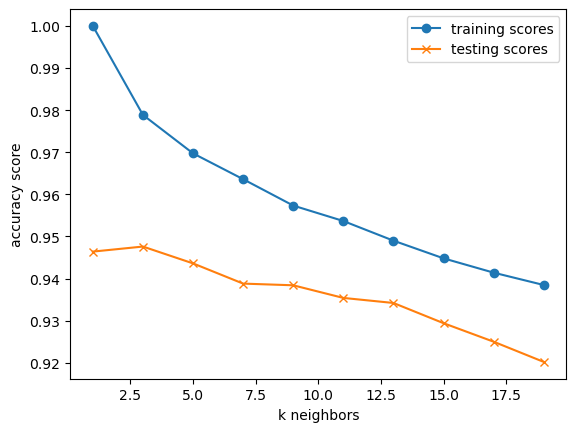

In [ ]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
# Plot the results
plt.plot(range(1, 20, 2), train_scores, marker='o', label="training scores")
plt.plot(range(1, 20, 2), test_scores, marker="x", label="testing scores")
plt.xlabel("k neighbors")
plt.ylabel("accuracy score")
plt.legend()
plt.show()

In [ ]:
data_letters = [X_train_scaled, X_test_scaled, y_train, y_test]

In [ ]:
def run_all_models2(data):
    print(f"----------------------------------------------------------------")
    print(f"-------- Mini Project Models")
    print(f"----------------------------------------------------------------")
    test_model(SVC(kernel='linear'), data)

    test_model(KNeighborsClassifier(n_neighbors=11), data)
    test_model(tree.DecisionTreeClassifier(), data)
    test_model(RandomForestClassifier(), data)
    test_model(ExtraTreesClassifier(random_state=1), data)
    test_model(GradientBoostingClassifier(random_state=1), data)
    test_model(AdaBoostClassifier(random_state=1), data)

    test_model(LogisticRegression(), data)

In [ ]:
run_all_models2(data_letters)

----------------------------------------------------------------
-------- Mini Project Models
----------------------------------------------------------------
Model: SVC
Train score: 0.8703333333333333
Test Score: 0.8538

Model: KNeighborsClassifier
Train score: 0.9536666666666667
Test Score: 0.9354

Model: DecisionTreeClassifier
Train score: 1.0
Test Score: 0.8668

Model: RandomForestClassifier
Train score: 1.0
Test Score: 0.9614

Model: ExtraTreesClassifier
Train score: 1.0
Test Score: 0.9694

Model: GradientBoostingClassifier
Train score: 0.9622
Test Score: 0.9146



/home/jeffco/anaconda3/envs/dev/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Model: AdaBoostClassifier
Train score: 0.31006666666666666
Test Score: 0.3092

Model: LogisticRegression
Train score: 0.7806
Test Score: 0.78

